# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-2,1e-4]
EPOCHS = 8
BATCH_SIZE = 256
#MOMENTUM = 0.95
OPTIMIZER = [keras.optimizers.SGD,
            keras.optimizers.RMSprop,
            keras.optimizers.Adagrad,
            keras.optimizers.Adam]
OPTIMIZER_NAME = ["SGD","RMSprop","Adagrad","Adam"]

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    name_index = 0
    """# different optimizer"""
    for optimizer in OPTIMIZER:
        keras.backend.clear_session() # 把舊的 Graph 清掉

        # different lr
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = optimizer(lr=lr)
    
        # compile
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        # fit
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = "OPTIMIZER =" + OPTIMIZER_NAME[name_index] + "-lr-" + str(lr)
        results[name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        name_index += 1

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [=============================

50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/8
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/8
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/8
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (No

50000/50000 [==============================] - 3s 70us/step - loss: 1.8957 - acc: 0.3302 - val_loss: 1.7598 - val_acc: 0.3687
Epoch 2/8
50000/50000 [==============================] - 3s 59us/step - loss: 1.7078 - acc: 0.4003 - val_loss: 1.6874 - val_acc: 0.3975
Epoch 3/8
50000/50000 [==============================] - 3s 58us/step - loss: 1.6237 - acc: 0.4285 - val_loss: 1.5965 - val_acc: 0.4347
Epoch 4/8
50000/50000 [==============================] - 3s 57us/step - loss: 1.5707 - acc: 0.4474 - val_loss: 1.5757 - val_acc: 0.4363
Epoch 5/8
50000/50000 [==============================] - 3s 59us/step - loss: 1.5290 - acc: 0.4632 - val_loss: 1.5141 - val_acc: 0.4602
Epoch 6/8
50000/50000 [==============================] - 3s 70us/step - loss: 1.4911 - acc: 0.4768 - val_loss: 1.5311 - val_acc: 0.4533
Epoch 7/8
50000/50000 [==============================] - 3s 61us/step - loss: 1.4552 - acc: 0.4872 - val_loss: 1.4750 - val_acc: 0.4728
Epoch 8/8
50000/50000 [==============================] - 3

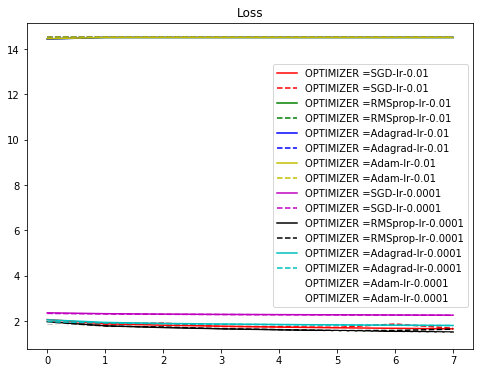

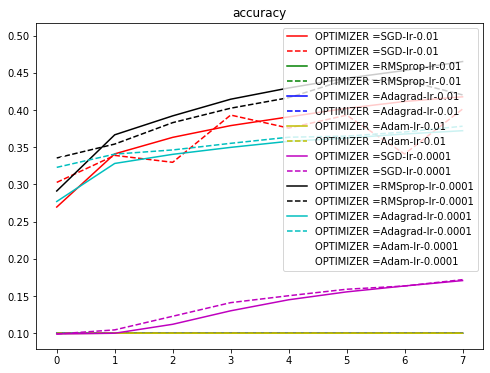

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","w",
            "r", "g", "b", "y", "m", "k","c","w"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("accuracy")
plt.legend()
plt.show()